## Bản tin thống kê sơ bộ điểm thi THPTQG năm 2022 của cả nước

Dựa trên repo sau đây: https://github.com/thevivotran/diem_thi_2022 và bản gốc https://github.com/anhdung98/diem_thi_2022, dưới đây là toàn bộ phiên bản riêng của tỉnh Tây Ninh

### Bước 1: Thêm các thư viện cần thiết

In [3]:
import pandas as pd
import numpy as np

### Bước 2: Truy xuất dữ liệu và thống kê

In [4]:
f = open('diem_thi_thpt_2022.csv', 'r').read()

In [5]:
f = [line.split(',') for line in f.splitlines()]

In [6]:
df = pd.DataFrame(f[1:], columns=f[0])

In [7]:
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,01000001,3.6,5.0,4.0,,,,2.75,6.0,8.75
1,01000002,8.4,6.75,7.6,,,,8.5,7.5,8.25
2,01000003,5.8,7.5,5.0,,,,7.25,5.5,8.75
3,01000004,7.4,7.5,8.6,,,,7.5,6.5,7.5
4,01000005,7.2,8.5,9.0,,,,8.0,8.5,8.25


### Bước 3: Xử lý mã tỉnh

In [8]:
testSubject = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
for s in testSubject:
    df[s]= pd.to_numeric(df[s], errors='coerce')
df['ma_tinh'] = df.apply(lambda row: str(row['sbd'])[:2], axis=1)

In [9]:
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_tinh
0,01000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,01
1,01000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,01
2,01000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,01
3,01000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,01
4,01000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,01


### Bước 4: Kiểm tra phổ điểm tất cả môn thi

<AxesSubplot:>

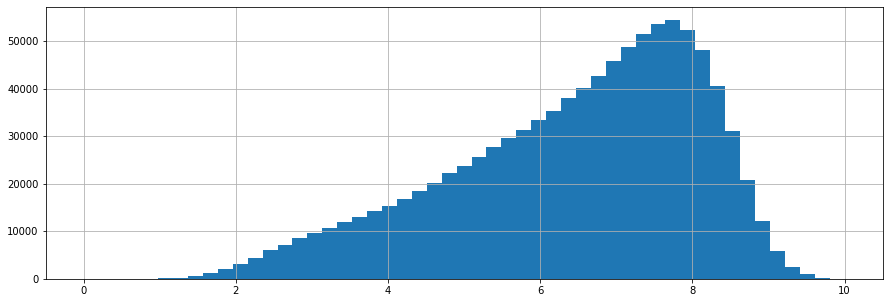

In [10]:
df.toan.hist(bins = 51,figsize = (15,5))

<AxesSubplot:>

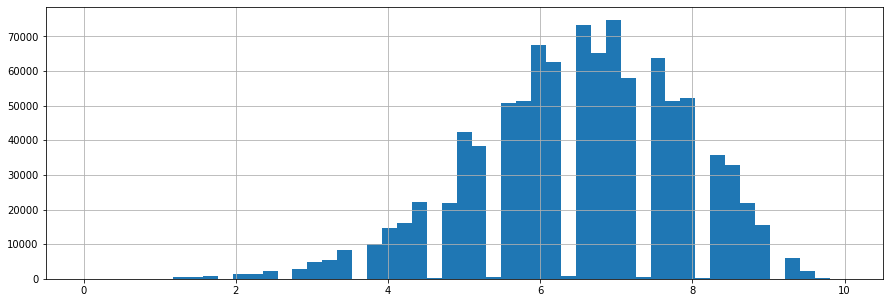

In [11]:
df.ngu_van.hist(bins = 51,figsize = (15,5))

<AxesSubplot:>

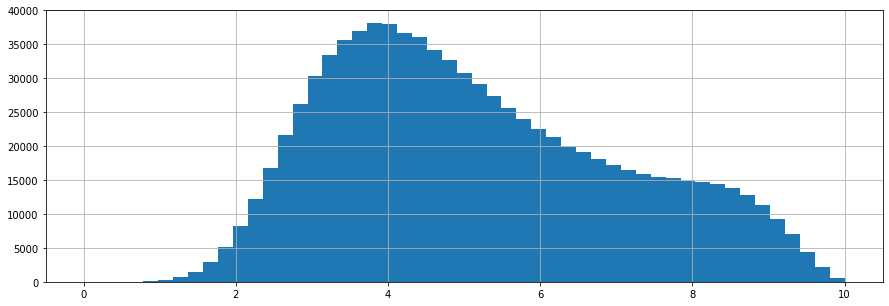

In [12]:
df.ngoai_ngu.hist(bins = 51,figsize = (15,5))

<AxesSubplot:>

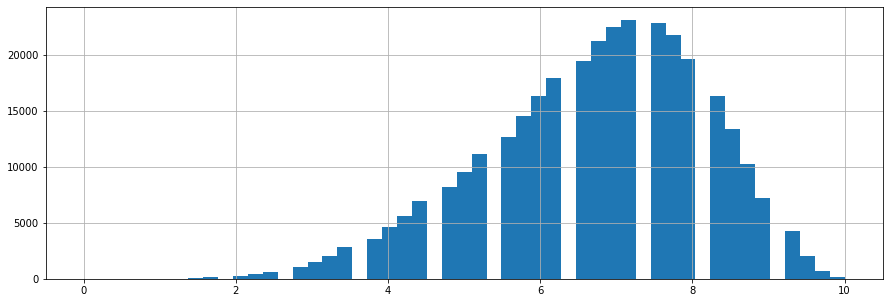

In [13]:
df.vat_li.hist(bins = 51,figsize = (15,5))

<AxesSubplot:>

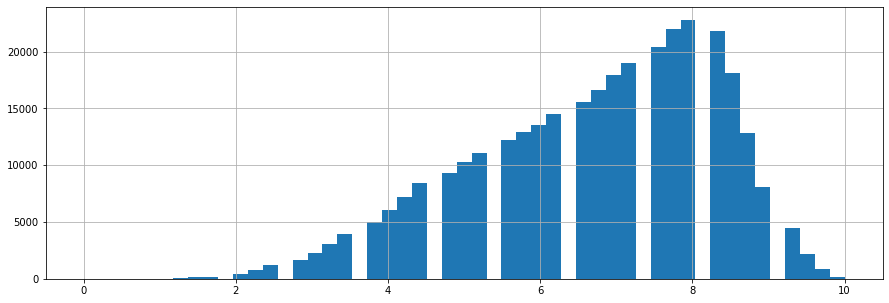

In [14]:
df.hoa_hoc.hist(bins = 51,figsize = (15,5))

<AxesSubplot:>

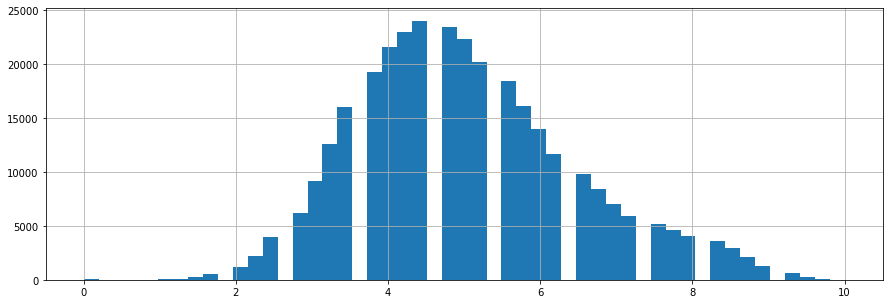

In [15]:
df.sinh_hoc.hist(bins = 51,figsize = (15,5))

<AxesSubplot:>

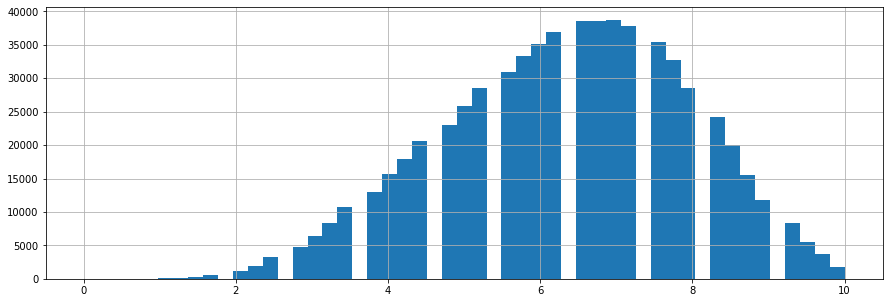

In [16]:
df.lich_su.hist(bins = 51,figsize = (15,5))

<AxesSubplot:>

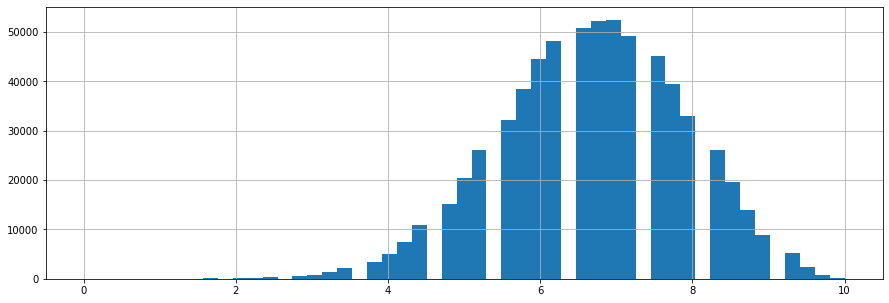

In [17]:
df.dia_li.hist(bins = 51,figsize = (15,5))

<AxesSubplot:>

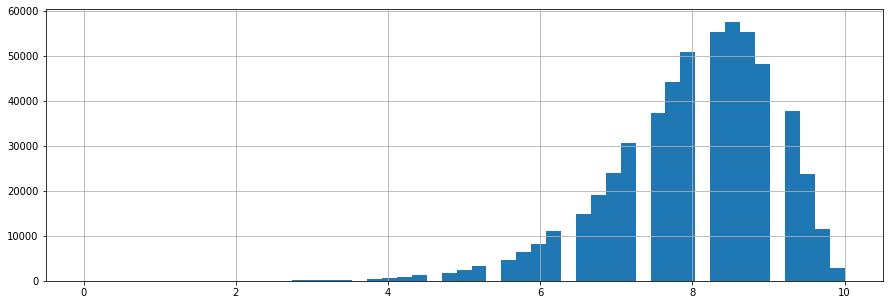

In [18]:
df.gdcd.hist(bins = 51,figsize = (15,5))

### Bước 5: Kiểm tra phổ điểm tỉnh Tây Ninh và so sánh với một số thành phố trực thuộc Trung ương

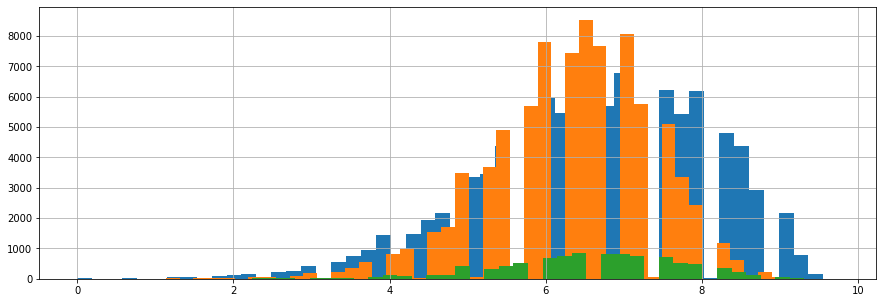

In [19]:
# Ha Noi, Ho Chi Minh, Tay Ninh
for ma_tinh in ['01', '02', '46']:
    df[df['ma_tinh'] == ma_tinh].ngu_van.hist(bins = 51, figsize = (15,5))

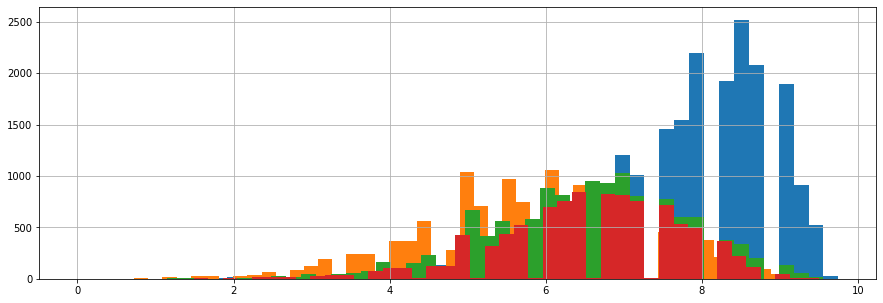

In [20]:
# Hai Phong, Da Nang, Can Tho, Tay Ninh
for ma_tinh in ['03', '04', '55', '46']:
    df[df['ma_tinh'] == ma_tinh].ngu_van.hist(bins = 51, figsize = (15,5))

### Bước 6: Xử lý tổng điểm 5 khối quan trọng

In [21]:
def comboundScore(row):
    toan = row.toan
    li = row.vat_li
    hoa = row.hoa_hoc
    sinh = row.sinh_hoc
    su = row.lich_su
    dia = row.dia_li
    van = row.ngu_van
    nn = row.ngoai_ngu
    
    if pd.notna(toan) is True and pd.notna(li) is True and pd.notna(hoa) is True:
        a00 = toan + li + hoa
    else:
        a00 = np.NaN
        
    if pd.notna(toan) is True and pd.notna(li) is True and pd.notna(nn) is True:
        a01 = toan + li + nn
    else:
        a01 = np.NaN

    if pd.notna(toan) is True and pd.notna(hoa) is True and pd.notna(sinh) is True:
        b00 = toan + hoa + sinh
    else:
        b00 = np.NaN
        
    if pd.notna(van) is True and pd.notna(su) is True and pd.notna(dia) is True:
        c00 = van + su + dia
    else:
        c00 = np.NaN

    if pd.notna(toan) is True and pd.notna(van) is True and pd.notna(nn) is True:
        d00 = toan + van + nn
    else:
        d00 = np.NaN

    return a00, a01, b00, c00, d00

In [22]:
df['a00'], df['a01'], df['b00'], df['c00'], df['d00']  = zip(*df.apply(comboundScore, axis=1))

In [23]:
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_tinh,a00,a01,b00,c00,d00
0,01000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,01,NaN,NaN,NaN,13.75,12.60
1,01000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,01,NaN,NaN,NaN,22.75,22.75
2,01000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,01,NaN,NaN,NaN,20.25,18.30
3,01000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,01,NaN,NaN,NaN,21.50,23.50
4,01000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,01,NaN,NaN,NaN,25.00,24.70


### Bước 7: Kiểm tra phổ điểm khối A01 và khối C với hai đô thị đặc biệt 

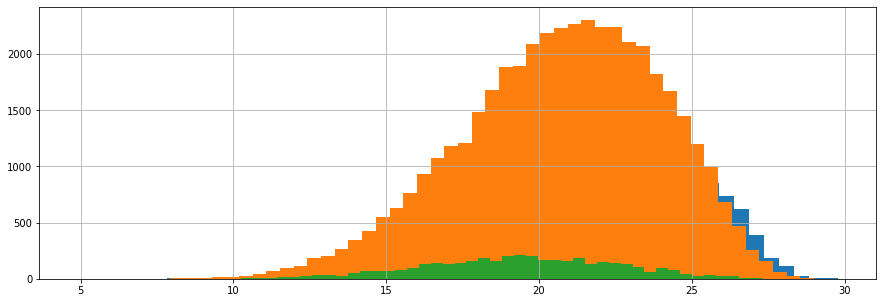

In [24]:
for ma_tinh in ['01', '02', '46']:
    df[df['ma_tinh'] == ma_tinh].a01.hist(bins = 51, figsize = (15,5))

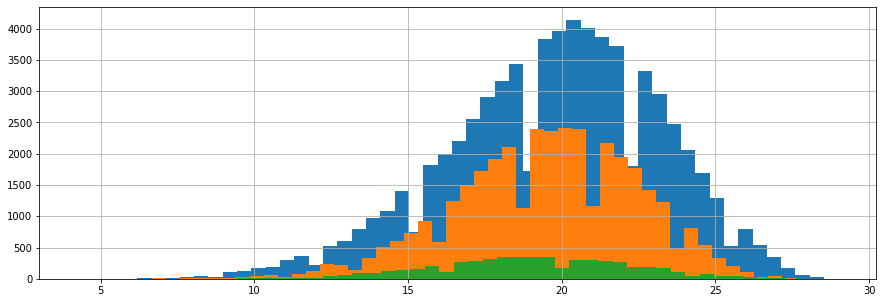

In [25]:
for ma_tinh in ['01', '02', '46']:
    df[df['ma_tinh'] == ma_tinh].c00.hist(bins = 51, figsize = (15,5))

### Bước 8: Lọc dữ liệu toàn tỉnh Tây Ninh

In [26]:
tay_ninh = df[(df.ma_tinh == '46')]
tay_ninh.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_tinh,a00,a01,b00,c00,d00
759453,46000001,4.4,7.00,3.2,NaN,NaN,NaN,4.50,7.5,6.75,46,NaN,NaN,NaN,19.00,14.60
759454,46000002,8.2,7.25,6.2,7.25,7.00,5.25,NaN,NaN,NaN,46,22.45,21.65,20.45,NaN,21.65
759455,46000003,4.6,6.75,3.4,NaN,NaN,NaN,4.25,5.0,8.00,46,NaN,NaN,NaN,16.00,14.75
759456,46000004,7.4,5.75,7.2,5.25,6.75,5.00,NaN,NaN,NaN,46,19.40,19.85,19.15,NaN,20.35
759457,46000005,7.6,7.25,4.8,NaN,NaN,NaN,7.50,7.0,8.50,46,NaN,NaN,NaN,21.75,19.65


### Bước 9: Tiến hành lọc tỷ lệ và vị trí tương ứng

In [27]:
def percentage(sbd, khoi):
    thi_sinh = df[df.sbd == sbd]
    diem = thi_sinh[khoi].values[0]
    ma_tinh = thi_sinh.ma_tinh.values[0]
    df_tinh = df[(df.ma_tinh == ma_tinh)]
    ti_le_tinh = len(df_tinh[(df_tinh[khoi] >= diem)]) / len(df_tinh[(df_tinh[khoi] >= 0)])
    ti_le_quoc_gia = len(df[(df[khoi] >= diem)]) / len(df[(df[khoi] >= 0)])
    
    print('''Điểm khối {} của thí sinh {} là: {}. Thuộc top:
    {:%} tỉnh
    {:%} quốc gia'''.format(khoi, sbd, diem, ti_le_tinh, ti_le_quoc_gia))

In [28]:
percentage('46000021', 'c00')

Điểm khối c00 của thí sinh 46000021 là: 25.75. Thuộc top:
    1.249331% tỉnh
    3.189475% quốc gia


In [29]:
percentage('46000021', 'd00')

Điểm khối d00 của thí sinh 46000021 là: 22.0. Thuộc top:
    13.523171% tỉnh
    19.822090% quốc gia
